# 1. EDA 및 전처리

## data.csv 파일
## (1) EDA

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format ='{:.4f}'.format

In [3]:
# 파일 불러오기
import pandas as pd
data = pd.read_csv('./data.csv', encoding='cp949')
print(f'shape:{data.shape}')
data['TAG_MIN'] =pd.to_datetime(data.TAG_MIN, format='%Y-%m-%d %H:%M:%S')
data.head()

shape:(2939722, 21)


,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,...,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
0,2022-01-03 11:22:07,102410,75.6648,30.0155,NaN,NaN,68.4386,72.8403,59.7862,51.7169,...,0.4504,NaN,NaN,859.8540,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03 11:22:08,102410,75.6706,32.2732,NaN,NaN,68.4386,78.4415,61.6286,50.4453,...,0.4504,0.0000,860.3380,859.7800,860.0440,859.7860,294.6580,272.5380,328.7340,328.8650
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.1460,68.4386,78.1099,61.5414,52.0196,...,0.4503,0.0000,860.3380,859.7800,859.9810,859.7240,294.6580,272.5380,328.7340,328.8050
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.1767,68.4999,77.5072,60.6663,52.6942,...,0.4502,0.0000,860.3380,859.8420,859.9500,859.5990,294.7190,272.5380,328.6740,328.8650
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.2075,68.4386,76.0262,61.1634,51.6915,...,0.4502,0.0000,860.3510,859.7910,859.9910,859.7310,294.7210,272.5990,328.7400,328.8080


In [4]:
#결측치 확인
data.isna().sum().sort_values(ascending=False)

소입1존 OP              4288
솔트조 온도 1 Zone         209
솔트조 온도 2 Zone         203
소입로 온도 4 Zone         170
소입로 온도 3 Zone         157
건조로 온도 2 Zone         148
소입로 CP 모니터 값          147
솔트 컨베이어 온도 2 Zone     142
소입로 온도 1 Zone         130
소입로 온도 2 Zone         128
건조로 온도 1 Zone         116
솔트 컨베이어 온도 1 Zone     106
세정기                    91
소입4존 OP                 3
소입3존 OP                 2
소입로 CP 값                1
건조 2존 OP                1
건조 1존 OP                1
배정번호                    0
소입2존 OP                 0
TAG_MIN                 0
dtype: int64

In [5]:
total_missing = data.isna().sum().sort_values(ascending=False)
count = 0
for i in total_missing:
    count +=i
print(f'총 결측 데이터의 개수는 {count}개 입니다.')

총 결측 데이터의 개수는 6043개 입니다.


In [6]:
# 결측치 처리 (linear interpolation)

# 결측치 처리 함수 정의
def handle_missing_values(group):
    # 각 변수에 대해 linear interpolate 수행
    group = group.interpolate(method='linear')
    # 처음이나 마지막에 있는 null 값은 가장 가까운 값으로 대체
    group = group.fillna(method='ffill').fillna(method='bfill')
    return group

# '배정번호' 기준으로 결측치 처리
data = data.groupby('배정번호').apply(handle_missing_values).reset_index(drop=True)

# 결과 확인
data.isna().sum().sort_values(ascending=False)

TAG_MIN              0
소입로 CP 값             0
솔트조 온도 1 Zone        0
솔트 컨베이어 온도 2 Zone    0
솔트 컨베이어 온도 1 Zone    0
소입로 온도 4 Zone        0
소입로 온도 3 Zone        0
소입로 온도 2 Zone        0
소입로 온도 1 Zone        0
소입로 CP 모니터 값         0
소입4존 OP              0
배정번호                 0
소입3존 OP              0
소입2존 OP              0
소입1존 OP              0
세정기                  0
건조로 온도 2 Zone        0
건조로 온도 1 Zone        0
건조 2존 OP             0
건조 1존 OP             0
솔트조 온도 2 Zone        0
dtype: int64

In [7]:
data.nunique()

TAG_MIN              2939722
배정번호                     136
건조 1존 OP              276047
건조 2존 OP              357465
건조로 온도 1 Zone          24555
건조로 온도 2 Zone          20971
세정기                    87470
소입1존 OP               698623
소입2존 OP               281506
소입3존 OP               190099
소입4존 OP               181395
소입로 CP 값               81024
소입로 CP 모니터 값            8268
소입로 온도 1 Zone          39877
소입로 온도 2 Zone           9474
소입로 온도 3 Zone           6035
소입로 온도 4 Zone           6578
솔트 컨베이어 온도 1 Zone      42503
솔트 컨베이어 온도 2 Zone      31364
솔트조 온도 1 Zone           4906
솔트조 온도 2 Zone           5807
dtype: int64

/tmp/ipykernel_3503290/1322246817.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row, col].get_xticks(), fontsize=12, rotation=45)
/tmp/ipykernel_3503290/1322246817.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_yticklabels(axes[row, col].get_yticks(), fontsize=12)


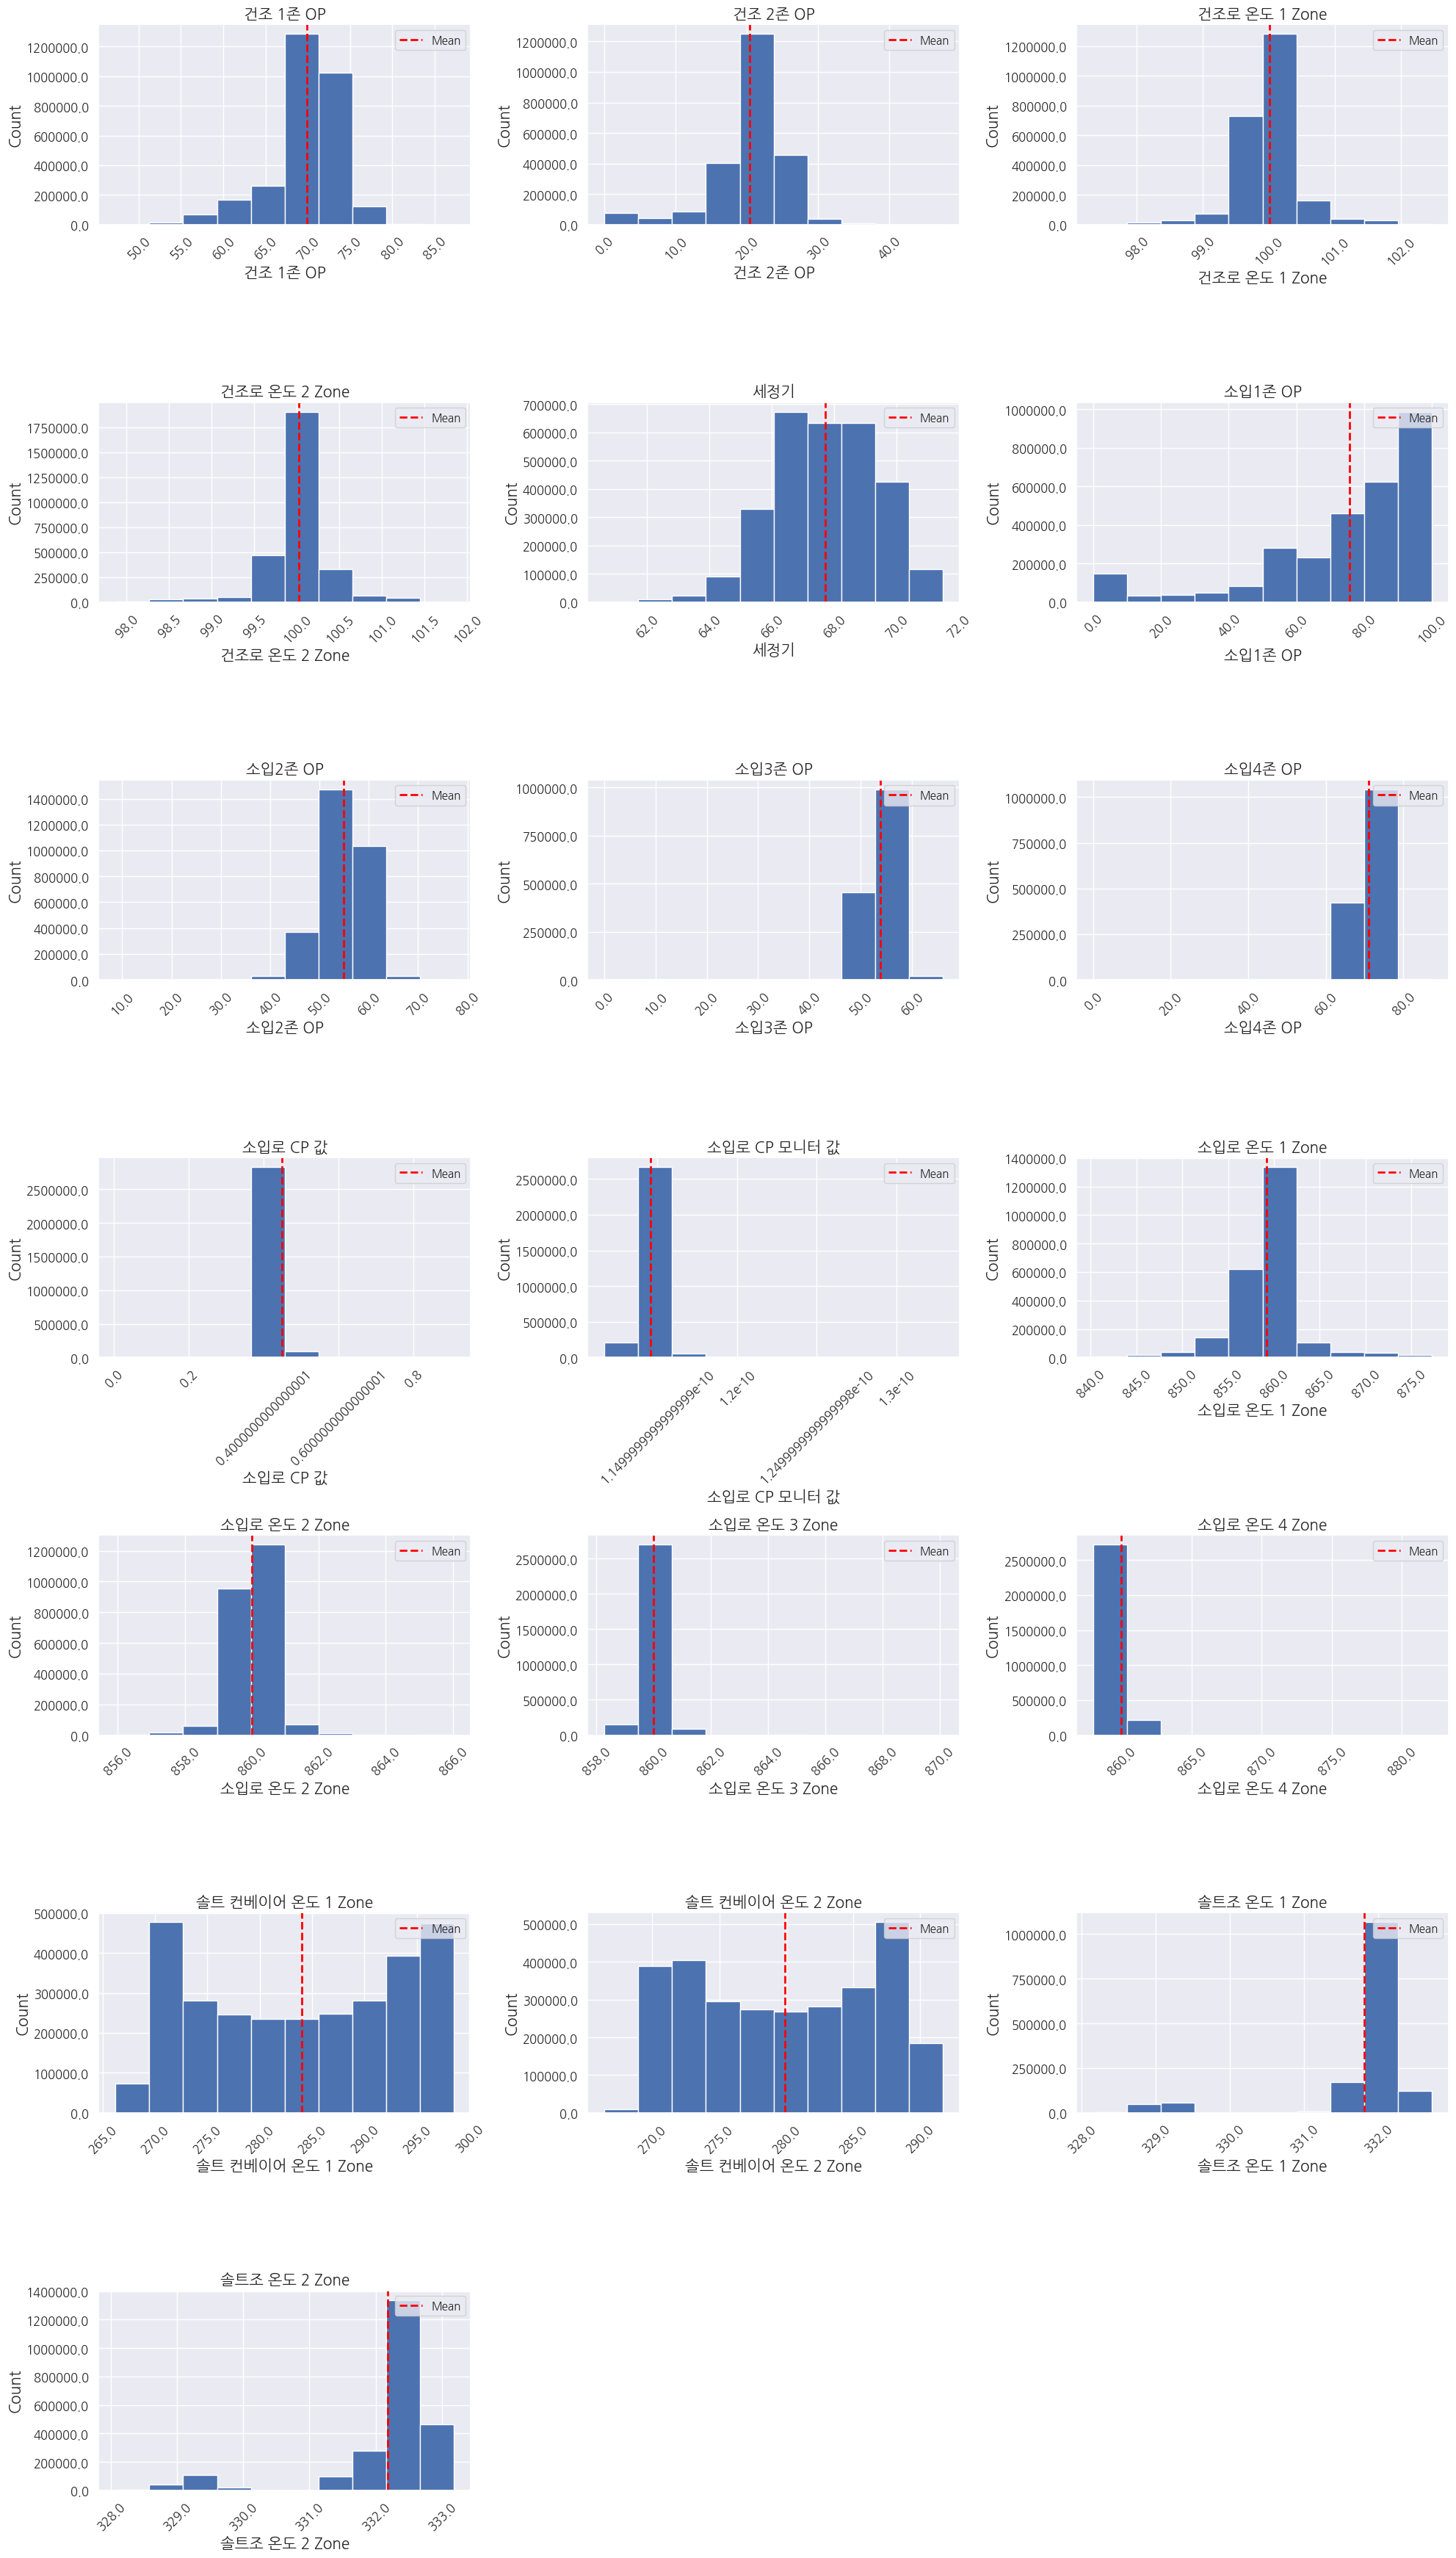

In [19]:
# 데이터 시각화1 : 히스토그램

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
sns.set(font="NanumGothic", rc={"axes.unicode_minus": False}, style='darkgrid')

FEATURE_COLUMNS = ['건조 1존 OP', '건조 2존 OP', '건조로 온도 1 Zone',
       '건조로 온도 2 Zone', '세정기', '소입1존 OP', '소입2존 OP', '소입3존 OP', '소입4존 OP',
       '소입로 CP 값', '소입로 CP 모니터 값', '소입로 온도 1 Zone', '소입로 온도 2 Zone',
       '소입로 온도 3 Zone', '소입로 온도 4 Zone', '솔트 컨베이어 온도 1 Zone',
       '솔트 컨베이어 온도 2 Zone', '솔트조 온도 1 Zone', '솔트조 온도 2 Zone']

# FEATURE_COLUMNS에 정의된 모든 열에 대한 subplot 생성 (한 줄에 3개씩)
num_columns = len(FEATURE_COLUMNS)
num_rows = (num_columns + 2) // 3  # 3개씩 나열되므로 필요한 행 수 계산
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

# 각 열에 대한 히스토그램 그리기
for i, column in enumerate(FEATURE_COLUMNS):
    row = i // 3  # 현재 열의 행 인덱스
    col = i % 3   # 현재 열의 열 인덱스
    axes[row, col].hist(data[column], bins=10)
    axes[row, col].set_xticklabels(axes[row, col].get_xticks(), fontsize=12, rotation=45)
    axes[row, col].set_yticklabels(axes[row, col].get_yticks(), fontsize=12)
    axes[row, col].set_xlabel(column, fontsize=15)
    axes[row, col].set_ylabel('Count', fontsize=15)
    axes[row, col].set_title(column, fontsize=15)
    
    # 각 히스토그램에 평균값에 해당하는 선 추가
    mean_value = data[column].mean()
    axes[row, col].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[row, col].legend(loc='upper right')

# 남은 subplot 제거
for i in range(num_columns, num_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


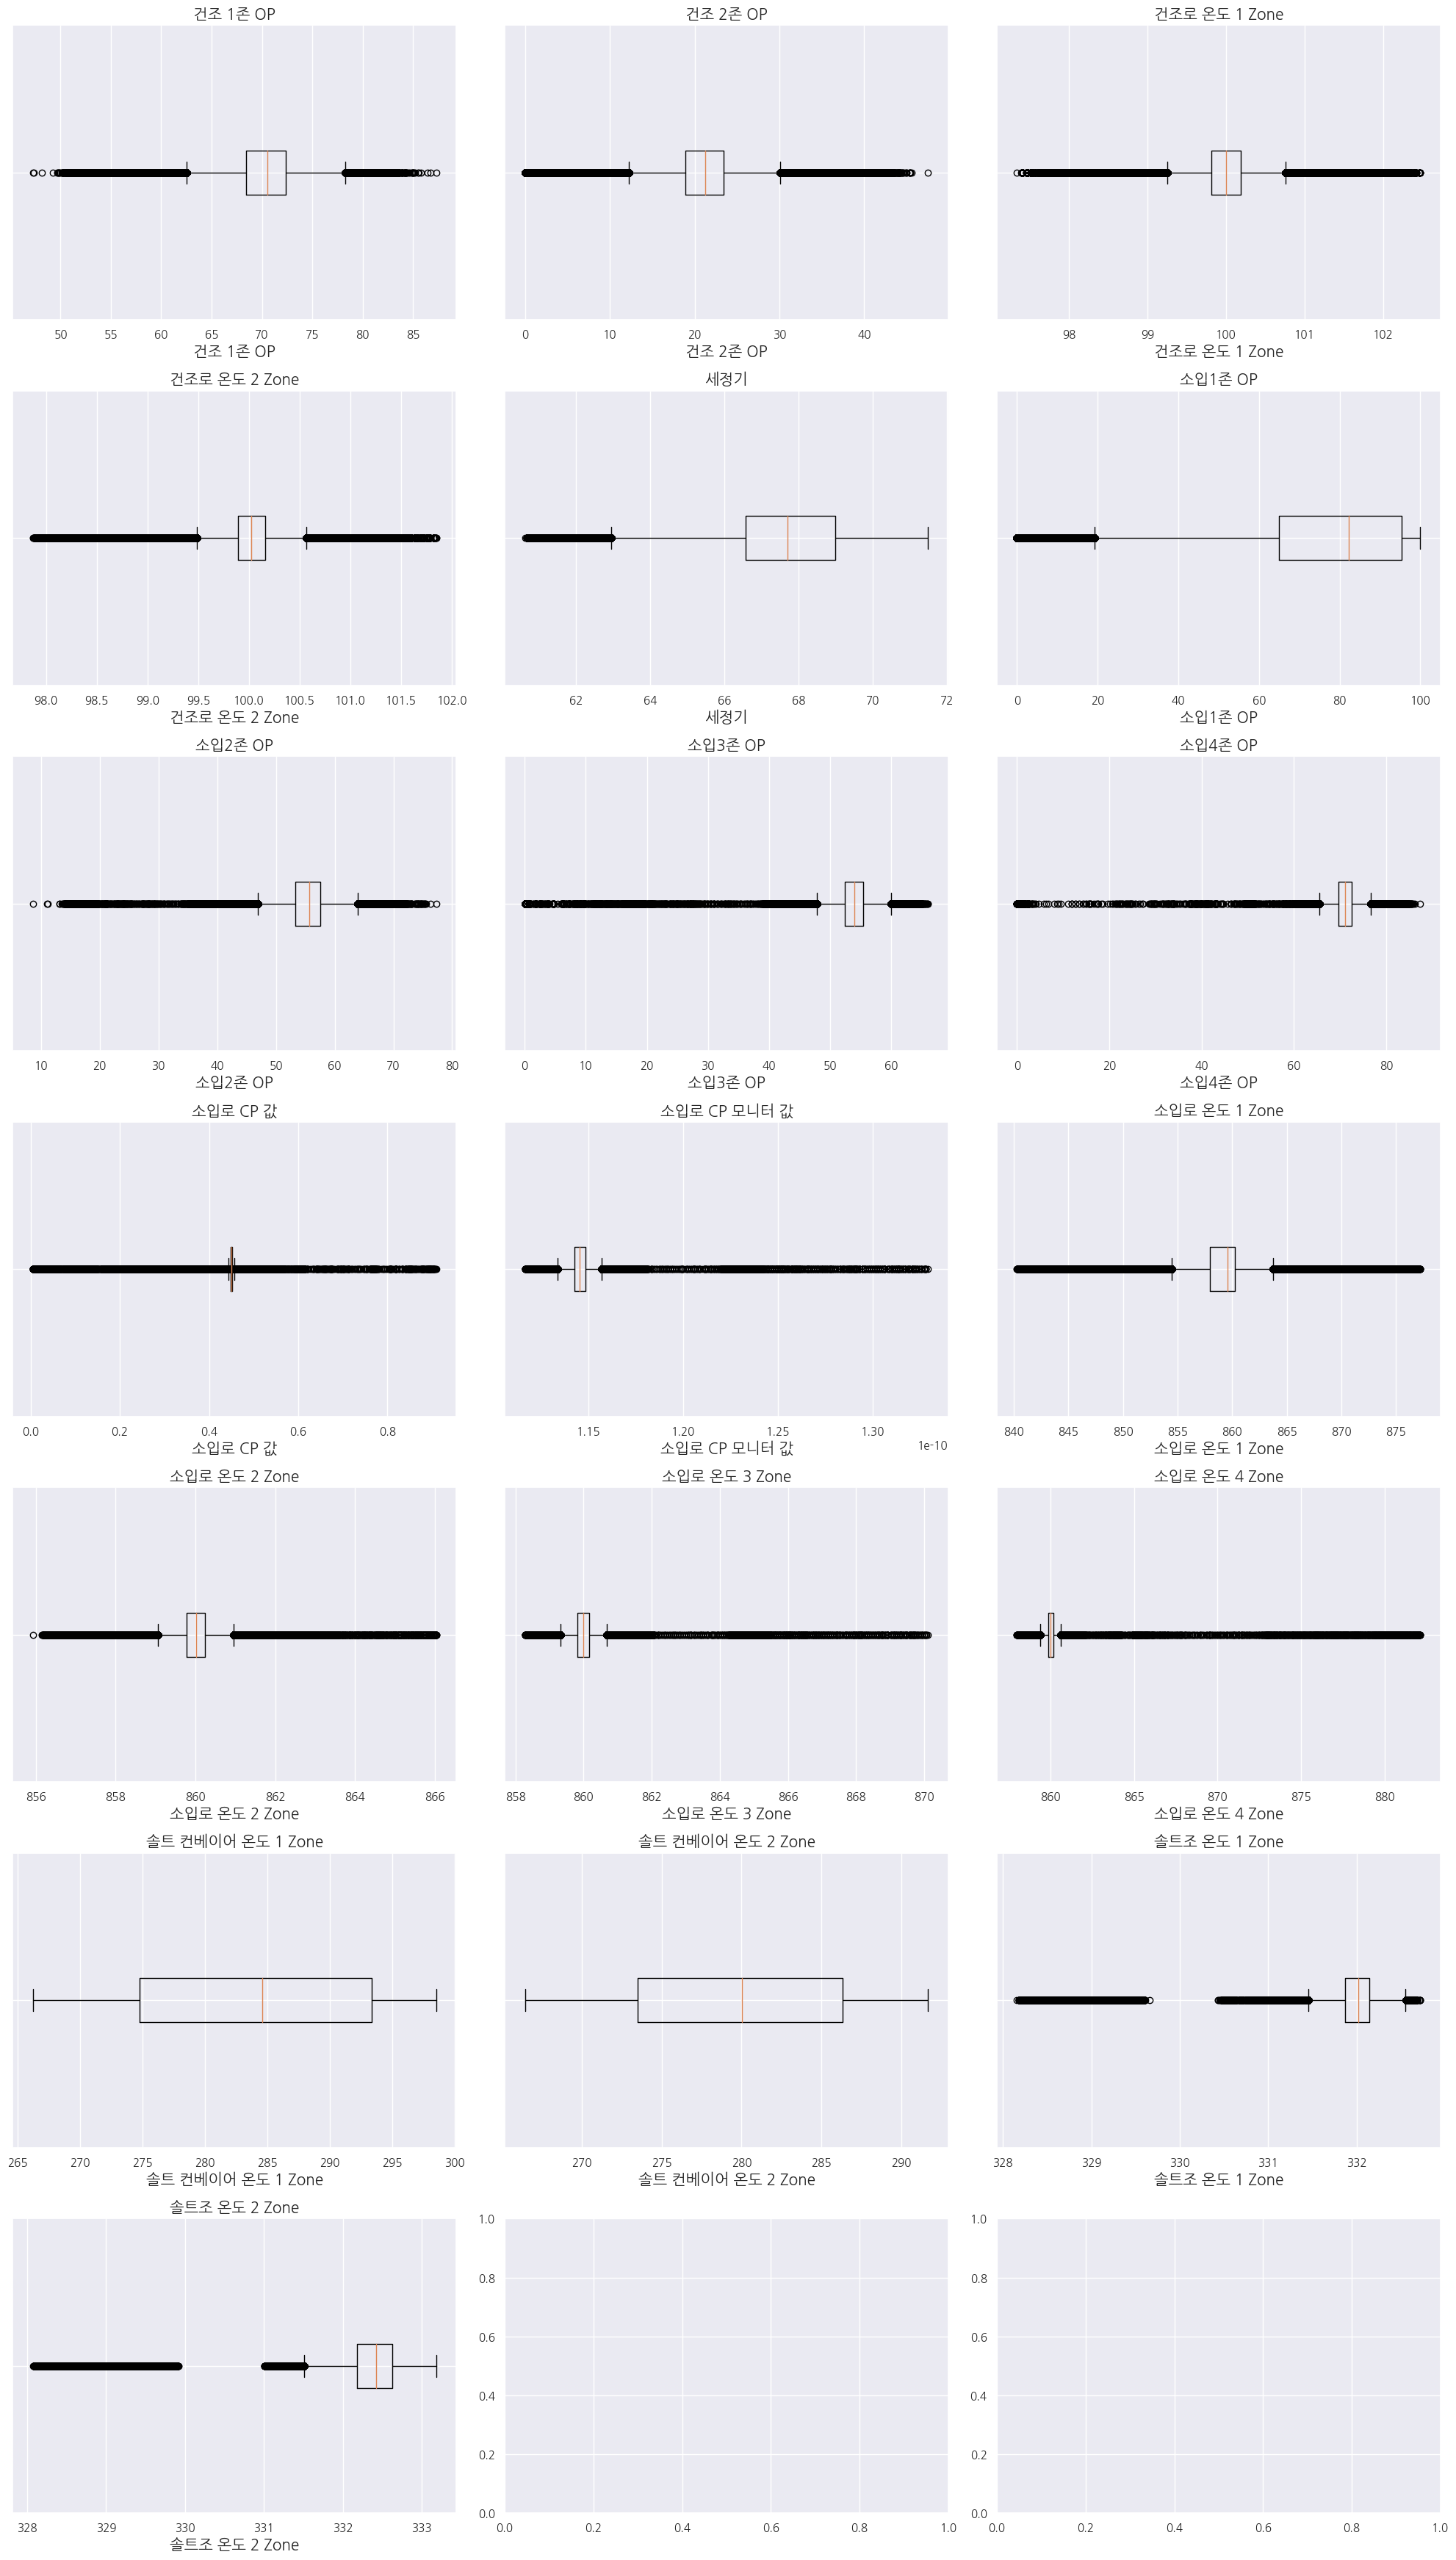

In [18]:
# 데이터 시각화2 : 박스플롯

# plt.figure(figsize=(10,6))
# plt.boxplot(data['건조 1존 OP'], vert=False)
# # plt.grid()
# plt.title('건조 1존 OP 박스플롯')
# plt.xlabel('건조 1존 OP의 온도')
# plt.yticks([1], ["건조 1존 OP"])
# plt.tight_layout()


import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
sns.set(font="NanumGothic", rc={"axes.unicode_minus": False}, style='darkgrid')

FEATURE_COLUMNS = ['건조 1존 OP', '건조 2존 OP', '건조로 온도 1 Zone',
       '건조로 온도 2 Zone', '세정기', '소입1존 OP', '소입2존 OP', '소입3존 OP', '소입4존 OP',
       '소입로 CP 값', '소입로 CP 모니터 값', '소입로 온도 1 Zone', '소입로 온도 2 Zone',
       '소입로 온도 3 Zone', '소입로 온도 4 Zone', '솔트 컨베이어 온도 1 Zone',
       '솔트 컨베이어 온도 2 Zone', '솔트조 온도 1 Zone', '솔트조 온도 2 Zone']

# FEATURE_COLUMNS에 정의된 모든 열에 대한 subplot 생성 (한 줄에 3개씩)
num_columns = len(FEATURE_COLUMNS)
num_rows = (num_columns + 2) // 3  # 3개씩 나열되므로 필요한 행 수 계산
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

# 각 열에 대한 박스플롯 그리기
for i, column in enumerate(FEATURE_COLUMNS):
    row = i // 3  # 현재 열의 행 인덱스
    col = i % 3   # 현재 열의 열 인덱스
    axes[row, col].boxplot(data[column], vert=False)
    axes[row, col].set_title(column, fontsize=15)
    axes[row, col].set_xlabel(column, fontsize=15)
    axes[row, col].set_yticks([1])
    axes[row, col].set_yticklabels([""])

plt.tight_layout()
plt.show()


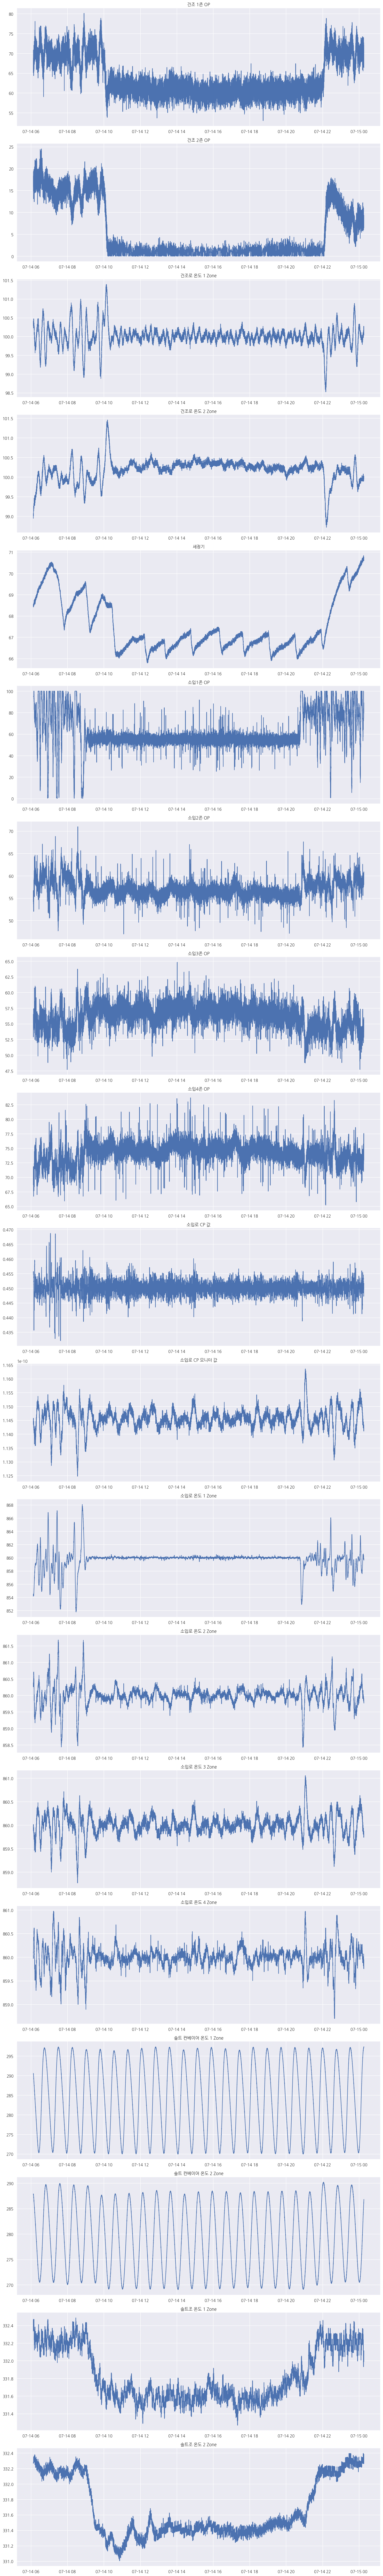

In [20]:
# 데이터 시각화3 : 배정번호별 피처 추세파악

process_num = 147008

FEATURE_COLUMNS = ['건조 1존 OP', '건조 2존 OP', '건조로 온도 1 Zone',
       '건조로 온도 2 Zone', '세정기', '소입1존 OP', '소입2존 OP', '소입3존 OP', '소입4존 OP',
       '소입로 CP 값', '소입로 CP 모니터 값', '소입로 온도 1 Zone', '소입로 온도 2 Zone',
       '소입로 온도 3 Zone', '소입로 온도 4 Zone', '솔트 컨베이어 온도 1 Zone',
       '솔트 컨베이어 온도 2 Zone', '솔트조 온도 1 Zone', '솔트조 온도 2 Zone']
# 데이터 필터링
subset_data = data[data['배정번호'] == process_num]

# plot
plt.figure(figsize=(15, len(subset_data.columns) * 5))  # 가로는 15, 세로는 변수의 개수에 따라 조절

for idx, column in enumerate(subset_data[FEATURE_COLUMNS], 1):
    if column != 'TAG_MIN':  # 'TAG_MIN' 컬럼을 y축으로 그리지 않기 위한 조건
        plt.subplot(len(subset_data.columns) - 1, 1, idx)  # '-1'을 해주는 이유는 'TAG_MIN' 컬럼은 그리지 않기 때문입니다.
        plt.plot(subset_data['TAG_MIN'], subset_data[column])
        plt.title(column)
        plt.tight_layout()

plt.show()

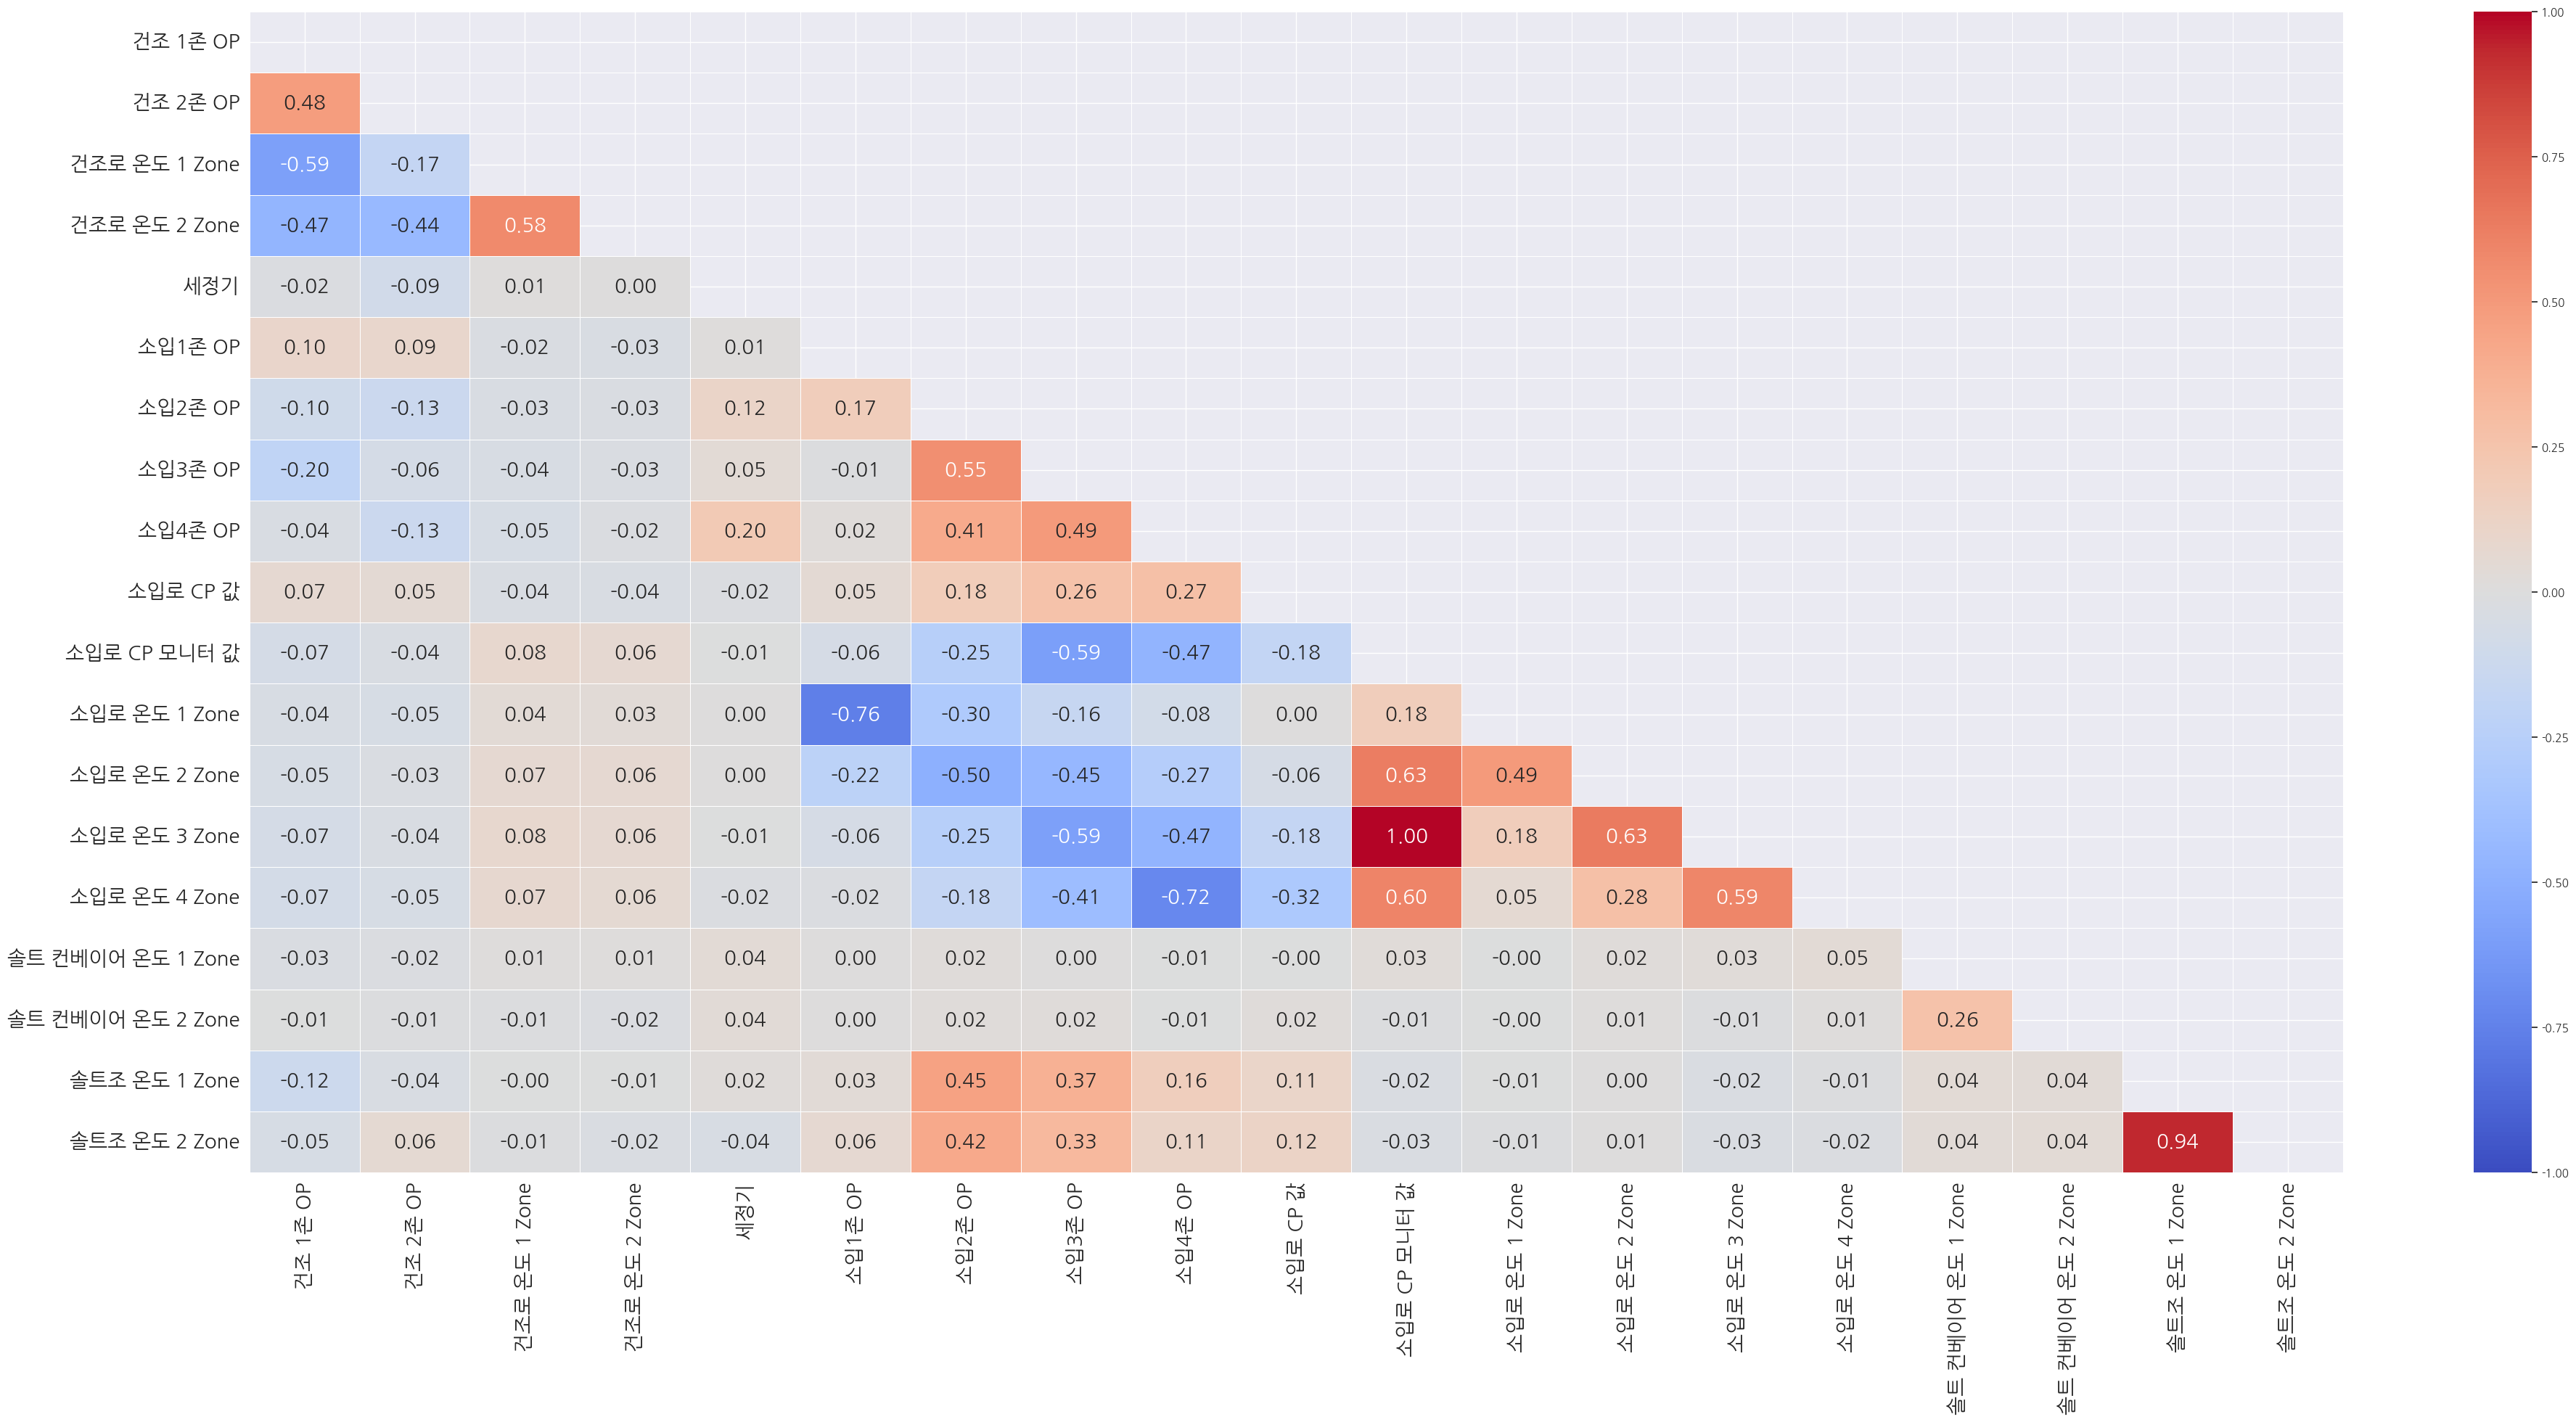

In [21]:
# Feature별 상관관계 확인

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'NanumGothic'

fig = plt.figure(figsize=(40, 20))
cmap = 'coolwarm'
target_cor = data[FEATURE_COLUMNS].corr().loc[FEATURE_COLUMNS]

# 겹치는 상관계수 제거, MASK 정보 입력
mask = np.triu(np.ones_like(target_cor, dtype=bool))
sns.heatmap(target_cor, mask=mask, 
            vmin=-1, vmax=1, 
            cmap=cmap, linewidths=.5, 
            annot=True, fmt=".2f")

plt.xticks(np.arange(0.5, len(target_cor.columns) + 0.5, 1), target_cor.columns, size=20, rotation=90)
plt.yticks(np.arange(0.5, len(target_cor.index) + 0.5, 1), target_cor.index, size=20)
plt.tight_layout()
plt.show()

## (2) 전처리

In [11]:
#상관관계가 높은 변수 제거

# 소입로 온도 3 Zone과 소입로 CP 모니터 값 - 상관계수 1
# 솔트조 온도 1 Zone과 솔트조 온도 2 Zone - 상관계수 0.94

del(data['소입로 CP 모니터 값'])
del(data['솔트조 온도 2 Zone'])


In [12]:
data.head()

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone
0,2022-01-03 11:22:07,102410,75.6648,30.0155,98.8533,99.1460,68.4386,72.8403,59.7862,51.7169,71.8405,0.4504,860.3380,859.8540,860.0440,859.7860,294.6580,272.5380,328.7340
1,2022-01-03 11:22:08,102410,75.6706,32.2732,98.8533,99.1460,68.4386,78.4415,61.6286,50.4453,70.5198,0.4504,860.3380,859.7800,860.0440,859.7860,294.6580,272.5380,328.7340
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.1460,68.4386,78.1099,61.5414,52.0196,72.0384,0.4503,860.3380,859.7800,859.9810,859.7240,294.6580,272.5380,328.7340
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.1767,68.4999,77.5072,60.6663,52.6942,73.4815,0.4502,860.3380,859.8420,859.9500,859.5990,294.7190,272.5380,328.6740
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.2075,68.4386,76.0262,61.1634,51.6915,71.6093,0.4502,860.3510,859.7910,859.9910,859.7310,294.7210,272.5990,328.7400


## quality.csv 파일
## (1) 라벨링

In [38]:
# 불량률 확인
# 불량률 = 불량수량/총수량

quality = pd.read_excel('./datasets/quality.xlsx')

quality['불량률'] = quality['불량수량']/quality['총수량']
quality

,배정번호,작업일,공정명,설비명,양품수량,불량수량,총수량,불량률
0,102410,2022-01-03,열처리,열처리 염욕_1,15160,3,15163,0.0002
1,102585,2022-01-03,열처리,열처리 염욕_1,29892,10,29902,0.0003
2,102930,2022-01-04,열처리,열처리 염욕_1,59616,30,59646,0.0005
3,103142,2022-01-05,열처리,열처리 염욕_1,74730,13,74743,0.0002
4,103675,2022-01-06,열처리,열처리 염욕_1,14979,2,14981,0.0001
...,...,...,...,...,...,...,...,...
131,147292,2022-07-14,열처리,열처리 염욕_1,43765,12,43777,0.0003
132,147546,2022-07-15,열처리,열처리 염욕_1,59957,16,59973,0.0003
133,147982,2022-07-18,열처리,열처리 염욕_1,40981,12,40993,0.0003
134,147996,2022-07-18,열처리,열처리 염욕_1,30239,9,30248,0.0003


In [54]:
# data.csv파일에서 이상치 개수 계산
# 이상치개수 --->  각 배정번호별 불량수량 : 각 배정번호별 총수량 = 각 배정번호별 이상치 개수 : 각 배정번호의 길이

import pandas as pd

# 데이터를 불러오기
data_data = pd.read_csv('data.csv', encoding='cp949')

# 배정번호를 그룹화하고 각 배정번호별 그룹의 개수를 계산
grouped_data = data_data.groupby('배정번호').size().reset_index(name='배정번호별 개수')

# 결과 출력
grouped_data

,배정번호,배정번호별 개수
0,102410,7342
1,102585,13299
2,102930,26982
3,103142,31729
4,103675,6218
...,...,...
131,147292,20151
132,147546,27651
133,147982,18558
134,147996,16092


In [45]:
# data.csv와 quality.csv에서의 배정번호가 모두 일치하나 확인

grouped_data['배정번호'] == quality['배정번호']
# 'grouped_data'와 'quality' 데이터프레임에서 '배정번호' 컬럼의 일치 여부 확인
all_matching = (grouped_data['배정번호'] == quality_data['배정번호']).all()

# 결과 출력
print("모든 배정번호가 일치하는지:", all_matching)

모든 배정번호가 일치하는지: True


In [55]:
grouped_data['배정번호별 개수'] = (grouped_data['배정번호별 개수'] * quality['불량률']).astype(int)
ㅎ

In [56]:
grouped_data

,배정번호,배정번호별 개수
0,102410,1
1,102585,4
2,102930,13
3,103142,5
4,103675,0
...,...,...
131,147292,5
132,147546,7
133,147982,5
134,147996,4


In [57]:
# 이상치개수 --->  각 배정번호별 불량수량 : 각 배정번호별 총수량 = 각 배정번호별 이상치 개수 : 각 배정번호의 길이
data_anomaly = pd.read_csv('./anomaly_counts.csv')
data_anomaly

,배정번호,이상치 개수
0,147008,11
1,146767,7
2,104388,9
3,134495,24
4,140314,1
...,...,...
131,127639,2
132,129121,1
133,105815,1
134,131758,2


In [15]:
# 각 배정번호별로 '불량률에 기반한 이상치 개수'에 따라 '이상치 점수'를 기준으로 이상치 선정
# 이상치는 제품 불량과 연관지어짐

# 이상치 점수는 데이터 포인트가 상한(upper_bound) 및 하한(lower_bound)에서 얼마나 멀리 떨어져 있는지를 나타내는 값임.
# 1.(subset < lower_bound)는 데이터 포인트가 하한보다 작은지 여부를 나타내는 boolean 배열을 반환함. 여기서 True는 1, False는 0
# 2.(lower_bound - subset)는 하한과 각 데이터 포인트 간의 차이를 나타냄. 따라서, 이 두 식을 곱하면, 하한보다 작은 데이터 포인트에 대해서만 차이가 계산됨.
# 3. (subset > upper_bound) 및 (subset - upper_bound)는 상한보다 큰 데이터 포인트에 대해 계산을 수행함.
# 4.위 두 계산 결과를 합산하여 각 피처의 이상치 점수를 얻음.
# 5.각 피처의 이상치 점수를 전부 더해 하나의 데이터포인트에 대한 이상치점수 계산.

anomalies_dict = {}

for assign_num, anomaly_count in zip(data_anomaly['배정번호'], data_anomaly['이상치 개수']):
    subset = data[data['배정번호'] == assign_num]
    
    # TAG_MIN 컬럼 제외
    subset = subset.drop(columns=['TAG_MIN'])


    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 점수 계산 
    anomaly_score = ((subset < lower_bound) * (lower_bound - subset) + 
                     (subset > upper_bound) * (subset - upper_bound)).sum(axis=1)
    
    # 가장 점수가 높은 데이터 포인트 선택
    anomaly_indices = anomaly_score.nlargest(anomaly_count).index.tolist()
    anomalies_dict[assign_num] = anomaly_indices

# 각 배정번호 별 이상치 데이터 포인트 출력
for assign_num, anomalies_indices in anomalies_dict.items():
    print(f"배정번호 {assign_num}의 이상치 데이터 포인트 인덱스:")
    print(anomalies_indices)
    print("-"*50)

배정번호 147008의 이상치 데이터 포인트 인덱스:
[2777026, 2777044, 2777043, 2777160, 2777046, 2777061, 2777060, 2777045, 2772130, 2777059, 2777065]
--------------------------------------------------
배정번호 146767의 이상치 데이터 포인트 인덱스:
[2748344, 2748348, 2748397, 2748385, 2748382, 2748376, 2748345]
--------------------------------------------------
배정번호 104388의 이상치 데이터 포인트 인덱스:
[146765, 146685, 165176, 165189, 165190, 165200, 165171, 165172, 165178]
--------------------------------------------------
배정번호 134495의 이상치 데이터 포인트 인덱스:
[1920944, 1920934, 1920943, 1920941, 1920921, 1884573, 1920988, 1920927, 1920928, 1884558, 1920935, 1921052, 1920922, 1920923, 1920947, 1920937, 1920905, 1920917, 1920963, 1920938, 1920924, 1920948, 1920912, 1920918]
--------------------------------------------------
배정번호 140314의 이상치 데이터 포인트 인덱스:
[2288694]
--------------------------------------------------
배정번호 116324의 이상치 데이터 포인트 인덱스:
[484300, 484328, 484327, 484468]
--------------------------------------------------
배정번호 125379의 이상치 

In [16]:
# 레이블 초기화 (0으로 설정)
data['label'] = 0

# anomalies_dict에 저장된 인덱스에 1 할당
for assign_num, anomalies_indices in anomalies_dict.items():
    data.loc[anomalies_indices, 'label'] = 1

data.head()

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,label
0,2022-01-03 11:22:07,102410,75.6648,30.0155,98.8533,99.1460,68.4386,72.8403,59.7862,51.7169,71.8405,0.4504,860.3380,859.8540,860.0440,859.7860,294.6580,272.5380,328.7340,0
1,2022-01-03 11:22:08,102410,75.6706,32.2732,98.8533,99.1460,68.4386,78.4415,61.6286,50.4453,70.5198,0.4504,860.3380,859.7800,860.0440,859.7860,294.6580,272.5380,328.7340,0
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.1460,68.4386,78.1099,61.5414,52.0196,72.0384,0.4503,860.3380,859.7800,859.9810,859.7240,294.6580,272.5380,328.7340,0
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.1767,68.4999,77.5072,60.6663,52.6942,73.4815,0.4502,860.3380,859.8420,859.9500,859.5990,294.7190,272.5380,328.6740,0
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.2075,68.4386,76.0262,61.1634,51.6915,71.6093,0.4502,860.3510,859.7910,859.9910,859.7310,294.7210,272.5990,328.7400,0


In [17]:
label_counts = data['label'].value_counts()
total = len(data)

print("레이블 별 데이터 포인트 개수:")
for label, count in label_counts.items():
    print(f"레이블 {label}: {count}개")

print("\n레이블 별 비율:")
for label, count in label_counts.items():
    ratio = count / total * 100
    print(f"레이블 {label}: {ratio:.2f}%")

레이블 별 데이터 포인트 개수:
레이블 0: 2938815개
레이블 1: 907개

레이블 별 비율:
레이블 0: 99.97%
레이블 1: 0.03%


In [18]:
# pandas 라이브러리를 임포트합니다.
import pandas as pd

# data 데이터프레임을 CSV 파일로 저장합니다.
data.to_csv('/home/user/Desktop/jeewon/2023_KAMP/FINAL/data_labeling.csv', index=False)